# Inverse Demand Problem

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demintro01.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2026-Jan-04</i>
<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-dark')
plt.style.use('seaborn-v0_8-talk') # bigger fonts

In [2]:
demand = lambda p: 0.5 * p ** -0.2 + 0.5 * p ** -0.5
derivative = lambda p: -0.01 * p ** -1.2 - 0.25 * p ** -1.5


print('%12s %8s' % ('Iteration', 'Price'))
p = 0.25
for it in range(100):
    f = demand(p) - 2
    d = derivative(p)
    s = -f / d
    p += s
    print(f'{it:10d}   {p:8.4f}')
    if np.linalg.norm(s) < 1.0e-8:
        break

pstar = p
qstar = demand(pstar)
print(f'The equilibrium price is {pstar:.3f}, where demand is {qstar:.2f}')

   Iteration    Price
         0     0.0843
         1     0.1363
         2     0.1558
         3     0.1539
         4     0.1543
         5     0.1542
         6     0.1542
         7     0.1542
         8     0.1542
         9     0.1542
        10     0.1542
        11     0.1542
The equilibrium price is 0.154, where demand is 2.00


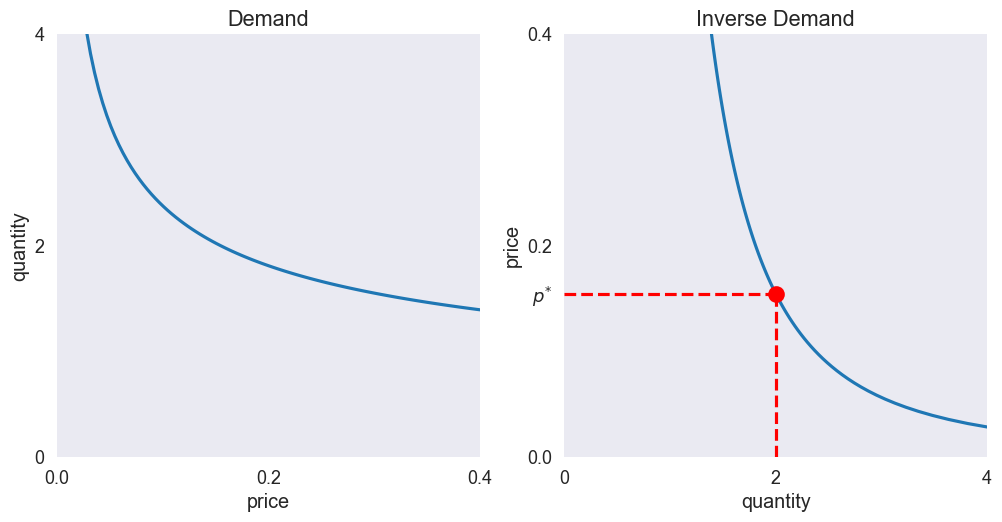

In [3]:
# Generate demand function
n, a, b = 100, 0.02, 0.40
p = np.linspace(a, b, n)
q = demand(p)

# Graph demand function
fig1, (ax0, ax1) = plt.subplots(1, 2, figsize=[12,6])
ax0.plot(p, q)

ax0.set(title='Demand',
        aspect=0.1,
        xlabel='price',
        xticks=[0.0, 0.2, 0.4],
        xlim=[0, 0.4],
        ylabel='quantity',
        yticks=[0, 2, 4],
        ylim=[0, 4])

# Graph inverse demand function
ax1.plot(q, p)
#ax1.plot([0, 2, 2], [pstar, pstar, 0], 'r--')
ax1.hlines(pstar, 0, 2, colors=['r'], linestyles=['--'])
ax1.vlines(2, 0, pstar, colors=['r'], linestyles=['--'])
ax1.plot([2], [pstar], 'ro', markersize=12)

ax1.set(title='Inverse Demand', 
        aspect=10,
        xlabel='quantity',
        xticks=[0, 2, 4], 
        xlim=[0, 4],
        ylabel='price',
        yticks=[0.0, pstar, 0.2, 0.4],
        yticklabels=['0.0', '$p^{*}$', '0.2', '0.4'], 
        ylim=[0, 0.4]);

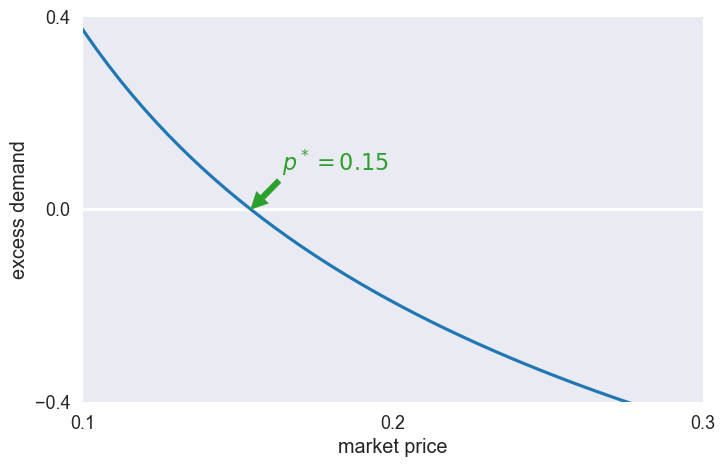

In [4]:
fig2, ax = plt.subplots(figsize=[8,5])
ax.axhline(0, color='w')
ax.plot(p, q-2)

ax.set(xlabel='market price',
       xticks=[0.1, 0.2, 0.3], 
       xlim=[0.1, 0.3],
       ylabel='excess demand', 
       yticks=[-0.4, 0, 0.4], 
       ylim=[-0.4, 0.4])

ax.annotate(f'$p^*={pstar:.2f}$', 
            (pstar, 0), 
            (pstar+0.01, 0.08), 
            color='C2', 
            fontsize=16, 
            arrowprops=dict(edgecolor='C2', facecolor='C2'));
